In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\medin\Desktop\customer\Train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


EDA

In [5]:
df.shape

(8068, 11)

In [6]:
df.columns


Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

ID Sütunu Bırakılıyor

In [7]:
df.drop(['ID'], axis=1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [8]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

<AxesSubplot:ylabel='Segmentation'>

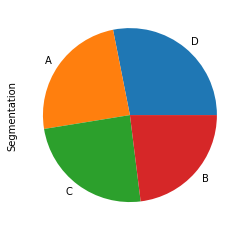

In [9]:
df['Segmentation'].value_counts().plot.pie()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


C:\Users\medin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


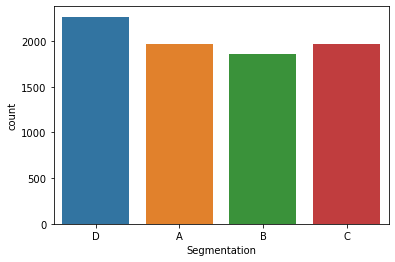

In [10]:
sns.countplot(df["Segmentation"])
print(df.Segmentation.value_counts())

In [11]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Kategorik Veri Bulma

In [12]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [13]:
categorical_features = df.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 7


In [14]:
df[categorical_features]

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
8063,Male,No,No,NaN,Low,Cat_1,D
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [15]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

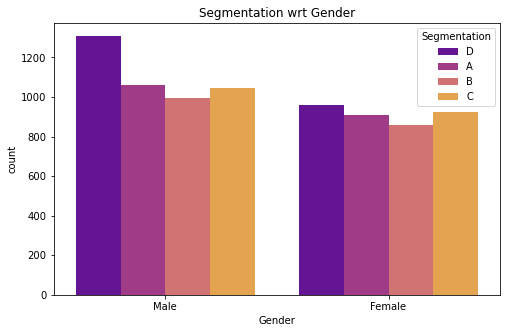

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Gender")
plt.show()

In [17]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

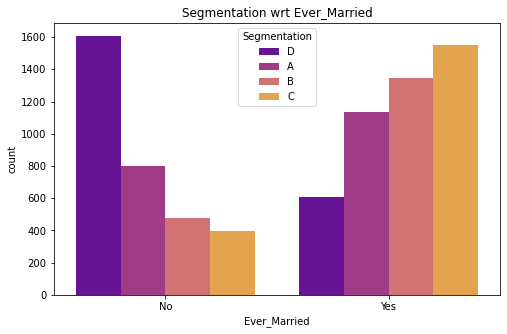

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Ever_Married',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Ever_Married")
plt.show()

Evli insanlar çoğunlukla C segmentinin bir parçasıdır, evli olmayanlar ise çoğunlukla D segmentinin bir parçasıdır.

In [19]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

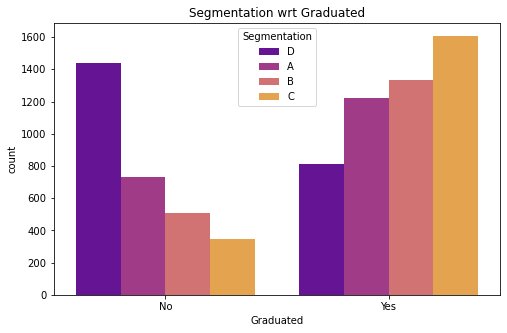

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Graduated',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Graduated")
plt.show()

Mezunlar çoğunlukla C Segmentinin bir parçasıdır, ancak Mezun olmayanlar çoğunlukla D segmentinin bir parçasıdır.

In [21]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

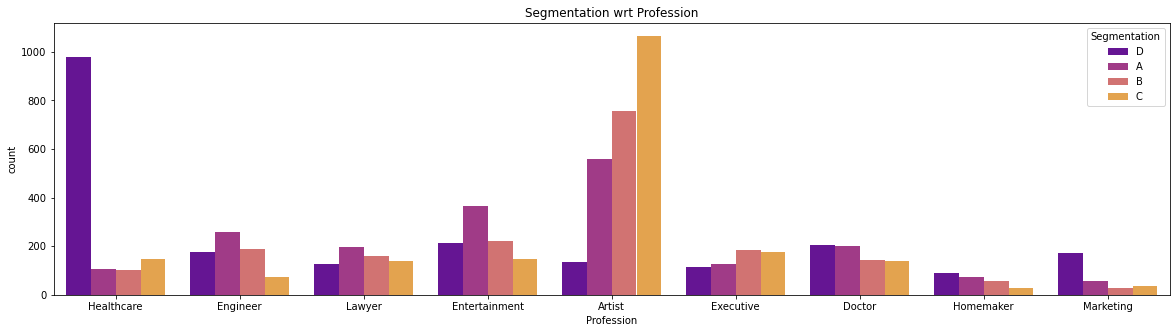

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x='Profession',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Profession")
plt.show()

Sağlık Çalışanları çoğunlukla Segment D'nin bir parçasıdır

In [23]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

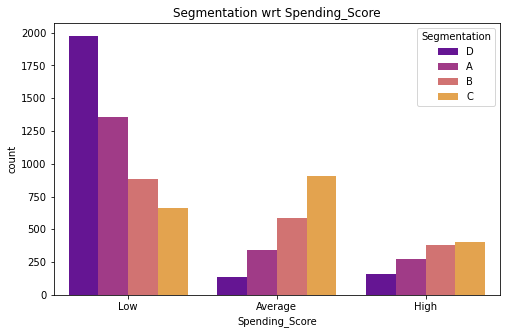

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='Spending_Score',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Spending_Score")
plt.show()

Düşük harcama puanına sahip kişiler çoğunlukla D Segmentinin bir parçasıdır

In [25]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

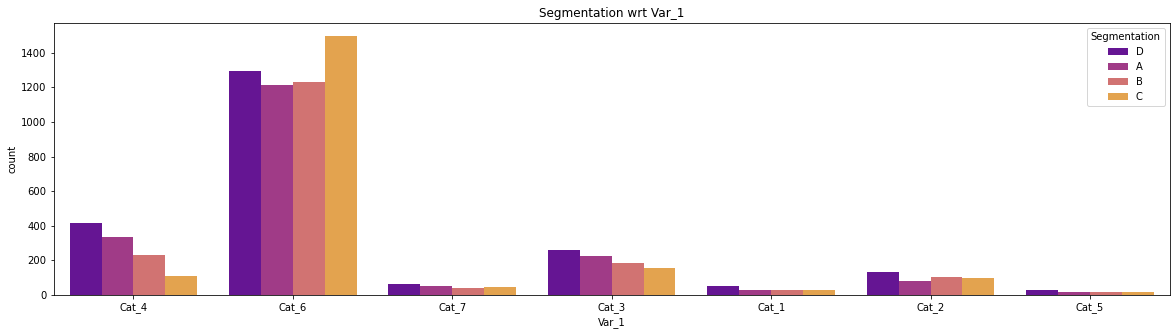

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x='Var_1',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Var_1")
plt.show()

In [27]:
df['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

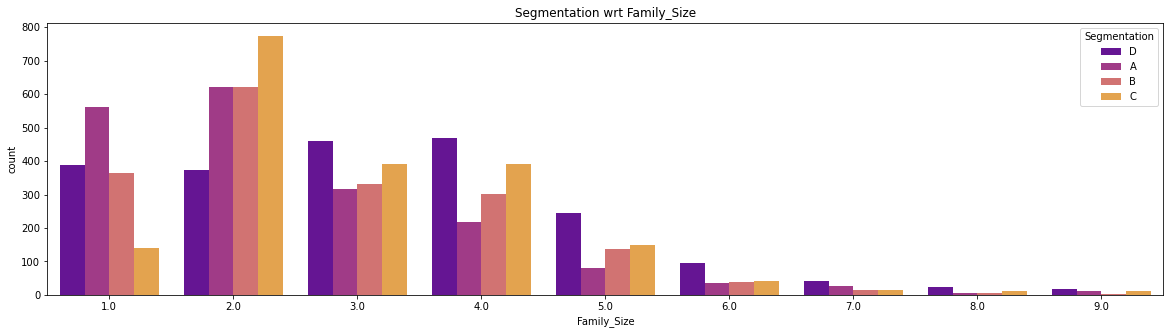

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(x='Family_Size',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Family_Size")
plt.show()

Kategorik Verileri Kodlama

In [29]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [30]:
df = df.drop(['ID'], axis=1)

In [31]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [32]:
# Replacing Male with 0 and Female with 1 in Gender column
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [33]:
# Replacing No with 0 and Yes with 1 in Ever_Married column
df['Ever_Married'] = df['Ever_Married'].replace({'No':0,'Yes':1})

In [34]:
# Replacing No with 0 and Yes with 1 in Graduated column
df['Graduated'] = df['Graduated'].replace({'No':0,'Yes':1})

In [35]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,Low,4.0,Cat_4,D
1,1,1.0,38,1.0,Engineer,NaN,Average,3.0,Cat_4,A
2,1,1.0,67,1.0,Engineer,1.0,Low,1.0,Cat_6,B
3,0,1.0,67,1.0,Lawyer,0.0,High,2.0,Cat_6,B
4,1,1.0,40,1.0,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,Low,7.0,Cat_1,D
8064,0,0.0,35,0.0,Executive,3.0,Low,4.0,Cat_4,D
8065,1,0.0,33,1.0,Healthcare,1.0,Low,1.0,Cat_6,D
8066,1,0.0,27,1.0,Healthcare,1.0,Low,4.0,Cat_6,B


In [36]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Spending_Score sütununda Düşük'ü 0, Ortalama'yı 1 ve Yüksek'i 2 ile değiştirme

In [37]:
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [38]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

Var_1 sütununda Cat_1'i 1, Cat_2'yi 2, Cat_3'ü 3, Cat4'ü 4, Cat_5'i 5, Cat_6'yı 6 ve Cat_7'yi Var_1 sütununda değiştirin

In [39]:
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [40]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,0,4.0,4.0,D
1,1,1.0,38,1.0,Engineer,NaN,1,3.0,4.0,A
2,1,1.0,67,1.0,Engineer,1.0,0,1.0,6.0,B
3,0,1.0,67,1.0,Lawyer,0.0,2,2.0,6.0,B
4,1,1.0,40,1.0,Entertainment,NaN,2,6.0,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,D
8064,0,0.0,35,0.0,Executive,3.0,0,4.0,4.0,D
8065,1,0.0,33,1.0,Healthcare,1.0,0,1.0,6.0,D
8066,1,0.0,27,1.0,Healthcare,1.0,0,4.0,6.0,B


In [41]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Var_1 sütununda Artist 0, Healthcare 1, Entertainment 2, Engineer 3, Doctor 4, Avukat 5, Executive 6, Marketing 7 ve Homemaker 8 ile değiştiriliyor

In [42]:
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [43]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,D
1,1,1.0,38,1.0,3.0,NaN,1,3.0,4.0,A
2,1,1.0,67,1.0,3.0,1.0,0,1.0,6.0,B
3,0,1.0,67,1.0,5.0,0.0,2,2.0,6.0,B
4,1,1.0,40,1.0,2.0,NaN,2,6.0,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,D
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,4.0,D
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0,D
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0,B


In [44]:
df['Profession'].value_counts()

0.0    2516
1.0    1332
2.0     949
3.0     699
4.0     688
5.0     623
6.0     599
7.0     292
8.0     246
Name: Profession, dtype: int64

In [45]:
df['Var_1'].value_counts()

6.0    5238
4.0    1089
3.0     822
2.0     422
7.0     203
1.0     133
5.0      85
Name: Var_1, dtype: int64

In [46]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

Spending_Score sütununda A'yı 0, B'yi 1, C'yi 2 ve D'yi 3 ile değiştirmek

In [47]:
df['Segmentation'] = df['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [48]:
df['Segmentation'].value_counts()

3    2268
0    1972
2    1970
1    1858
Name: Segmentation, dtype: int64

In [49]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,3
1,1,1.0,38,1.0,3.0,NaN,1,3.0,4.0,0
2,1,1.0,67,1.0,3.0,1.0,0,1.0,6.0,1
3,0,1.0,67,1.0,5.0,0.0,2,2.0,6.0,1
4,1,1.0,40,1.0,2.0,NaN,2,6.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,3
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,4.0,3
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0,3
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0,1


Eksik verileri doldurma

In [50]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [51]:
df['Ever_Married'].fillna(int(df['Ever_Married'].mean()), inplace=True)

In [52]:
df['Ever_Married'].value_counts()

1.0    4643
0.0    3425
Name: Ever_Married, dtype: int64

In [53]:
df['Graduated'].fillna(int(df['Graduated'].mean()), inplace=True)
df['Profession'].fillna(int(df['Profession'].mean()), inplace=True)
df['Work_Experience'].fillna(int(df['Work_Experience'].mean()), inplace=True)
df['Family_Size'].fillna(int(df['Family_Size'].mean()), inplace=True)
df['Var_1'].fillna(int(df['Var_1'].mean()), inplace=True)

In [54]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [55]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,3
1,1,1.0,38,1.0,3.0,2.0,1,3.0,4.0,0
2,1,1.0,67,1.0,3.0,1.0,0,1.0,6.0,1
3,0,1.0,67,1.0,5.0,0.0,2,2.0,6.0,1
4,1,1.0,40,1.0,2.0,2.0,2,6.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,2.0,0.0,0,7.0,1.0,3
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,4.0,3
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0,3
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0,1


Veri Setini Eğitim ve Test Setine Bölme

In [56]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
print(X)
print(y)

[[ 0.  0. 22. ...  0.  4.  4.]
 [ 1.  1. 38. ...  1.  3.  4.]
 [ 1.  1. 67. ...  0.  1.  6.]
 ...
 [ 1.  0. 33. ...  0.  1.  6.]
 [ 1.  0. 27. ...  0.  4.  6.]
 [ 0.  1. 37. ...  1.  3.  4.]]
[3 0 1 ... 3 1 1]


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train

array([[ 1.,  1., 38., ...,  0.,  4.,  3.],
       [ 1.,  0., 33., ...,  0.,  5.,  3.],
       [ 1.,  1., 49., ...,  0.,  1.,  7.],
       ...,
       [ 1.,  0., 40., ...,  0.,  1.,  6.],
       [ 0.,  1., 29., ...,  0.,  5.,  4.],
       [ 1.,  0., 27., ...,  0.,  9.,  6.]])

Rastgele Orman Sınıflandırması Modelinin Eğitim Setinde Eğitimi

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

tahmin1 = classifier.predict(X_test)
tahmin1

array([3, 0, 3, ..., 2, 3, 1], dtype=int64)

In [62]:
from sklearn.model_selection import cross_val_score
accuracy1 = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv=10)
accuracy1
print("%0.5f oranında ortalama başarı oranı ve %0.5f standart sapma elde edilmiştir." % (accuracy1.mean(), accuracy1.std()))

0.49101 oranında ortalama başarı oranı ve 0.01880 standart sapma elde edilmiştir.


In [64]:
tahmin1 = classifier.predict(X_test)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahmin1))

              precision    recall  f1-score   support

           0       0.38      0.36      0.37       391
           1       0.39      0.34      0.36       369
           2       0.50      0.52      0.51       380
           3       0.63      0.69      0.66       474

    accuracy                           0.49      1614
   macro avg       0.47      0.48      0.47      1614
weighted avg       0.48      0.49      0.49      1614



In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin1)
print(cm)
accuracy_score(y_test, tahmin1)

[[140  87  58 106]
 [ 91 126 109  43]
 [ 59  80 198  43]
 [ 80  34  33 327]]


0.49008674101610905

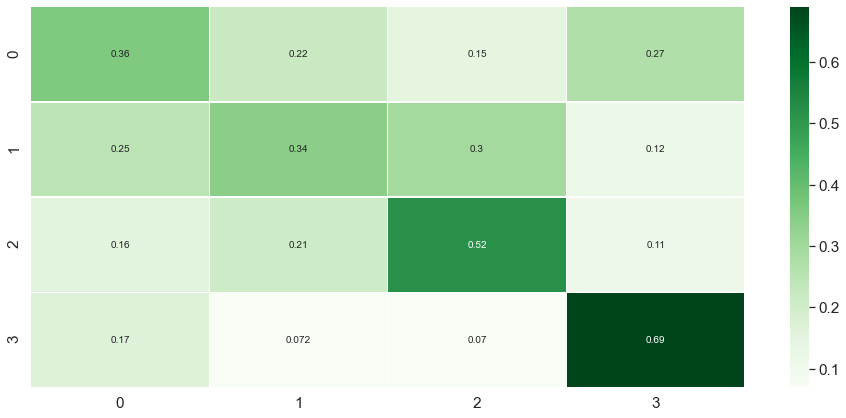

In [67]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.show()

KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(X_train, y_train)
    print(sayac, " ", "Dogruluk orani %", knn_yeni.score(X_test,y_test)*100)
    sayac += 1

1   Dogruluk orani % 41.759603469640645
2   Dogruluk orani % 39.838909541511775
3   Dogruluk orani % 43.12267657992565
4   Dogruluk orani % 43.68029739776952
5   Dogruluk orani % 43.99008674101611
6   Dogruluk orani % 44.73358116480793
7   Dogruluk orani % 45.47707558859975
8   Dogruluk orani % 46.15861214374225
9   Dogruluk orani % 45.786864931846345
10   Dogruluk orani % 45.786864931846345


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [70]:
tahmin2 = knn.predict(X_test)

In [71]:
from sklearn.model_selection import cross_val_score
accuracy2 = cross_val_score(knn, X_train, y_train, scoring="accuracy", cv=10)
accuracy2

array([0.45975232, 0.45975232, 0.43962848, 0.48452012, 0.45736434,
       0.49457364, 0.45271318, 0.49612403, 0.45271318, 0.42790698])

In [72]:
print("%0.5f oranında ortalama başarı oranı ve %0.5f standart sapma elde edilmiştir." % (accuracy2.mean(), accuracy2.std()))

0.46250 oranında ortalama başarı oranı ve 0.02144 standart sapma elde edilmiştir.


In [73]:
tahmin2 = knn.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahmin2))

              precision    recall  f1-score   support

           0       0.36      0.41      0.39       391
           1       0.33      0.30      0.32       369
           2       0.45      0.46      0.46       380
           3       0.65      0.63      0.64       474

    accuracy                           0.46      1614
   macro avg       0.45      0.45      0.45      1614
weighted avg       0.46      0.46      0.46      1614



In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin2)
print(cm)
accuracy_score(y_test, tahmin2)

[[162  96  55  78]
 [101 110 119  39]
 [ 76  89 174  41]
 [105  34  36 299]]


0.46158612143742256

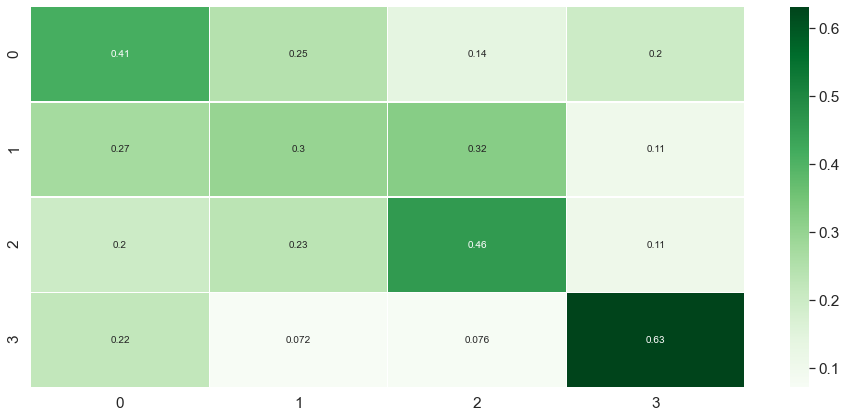

In [76]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.show()

Multilayer Perceptron (Çok Katmanlı Nmron (Algılayıcı))

In [77]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000,random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=0)

In [78]:
mlp.fit(X_train, y_train)
accuracy3 = cross_val_score(mlp, X_train, y_train, scoring="accuracy", cv=10)
accuracy3

array([0.46904025, 0.49226006, 0.47213622, 0.49845201, 0.52093023,
       0.49612403, 0.48062016, 0.50542636, 0.49767442, 0.45271318])

In [79]:
print("%0.5f oranında ortalama başarı oranı ve %0.5f standart sapma elde edilmiştir." % (accuracy3.mean(), accuracy3.std()))

0.48854 oranında ortalama başarı oranı ve 0.01893 standart sapma elde edilmiştir.


In [80]:
tahmin3 = mlp.predict(X_test)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahmin3))

              precision    recall  f1-score   support

           0       0.39      0.44      0.41       391
           1       0.42      0.22      0.29       369
           2       0.53      0.57      0.55       380
           3       0.61      0.73      0.67       474

    accuracy                           0.51      1614
   macro avg       0.49      0.49      0.48      1614
weighted avg       0.49      0.51      0.49      1614



In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, tahmin3)
print(cm)
accuracy_score(y_test, tahmin3)

[[171  51  57 112]
 [114  81 124  50]
 [ 65  40 217  58]
 [ 91  23  13 347]]


0.5055762081784386

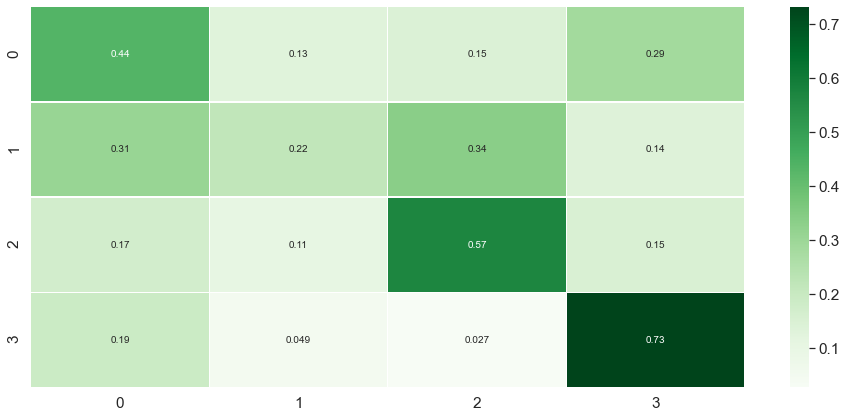

In [83]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.show()